In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [2]:
df = pd.read_csv("c:\\Users\\ACER\\OneDrive\\Desktop\\Datasets\\Lifestyle_and_Health_Risk_Prediction_Synthetic_Dataset.csv")
print("First 5 rows:\n", df.head())
print("\nShape of dataset:", df.shape)

First 5 rows:
    age  weight  height exercise  sleep sugar_intake smoking alcohol married  \
0   56      67     195      low    6.1       medium     yes     yes     yes   
1   69      76     170     high    6.9         high      no      no      no   
2   46     106     153     high    6.6          low     yes      no      no   
3   32      54     186   medium    8.5       medium      no      no      no   
4   60      98     195     high    8.0          low      no      no     yes   

      profession   bmi health_risk  
0  office_worker  17.6        high  
1        teacher  26.3        high  
2         artist  45.3        high  
3         artist  15.6         low  
4        teacher  25.8        high  

Shape of dataset: (5000, 12)


In [3]:
print(df.isna().sum())

age             0
weight          0
height          0
exercise        0
sleep           0
sugar_intake    0
smoking         0
alcohol         0
married         0
profession      0
bmi             0
health_risk     0
dtype: int64


In [4]:
df.columns = df.columns.str.replace(' ','_')

In [5]:
df.duplicated().sum()

0

In [7]:
#  Encode Categorical Variables
label = LabelEncoder()
for col in ['exercise', 'sugar_intake', 'smoking', 'alcohol', 'married', 'profession', 'health_risk']:
    df[col] = label.fit_transform(df[col])

print("\nEncoded Columns:\n", df.head())


Encoded Columns:
    age  weight  height  exercise  sleep  sugar_intake  smoking  alcohol  \
0   56      67     195         1    6.1             2        1        1   
1   69      76     170         0    6.9             0        0        0   
2   46     106     153         0    6.6             1        1        0   
3   32      54     186         2    8.5             2        0        0   
4   60      98     195         0    8.0             1        0        0   

   married  profession   bmi  health_risk  
0        1           5  17.6            0  
1        0           7  26.3            0  
2        0           0  45.3            0  
3        0           0  15.6            1  
4        1           7  25.8            0  


In [8]:
# Select Target and Independent Variables
# -----------------------------------
X = df.drop(columns=['health_risk'])
y = df['health_risk']

print("\nIndependent Variables:\n", X.columns.tolist())
print("\nTarget Variable:", 'health_risk')


Independent Variables:
 ['age', 'weight', 'height', 'exercise', 'sleep', 'sugar_intake', 'smoking', 'alcohol', 'married', 'profession', 'bmi']

Target Variable: health_risk


In [10]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


In [11]:
# Logistic Regression
lr = LogisticRegression(max_iter=1000)
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)

In [12]:
# Decision Tree
dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train, y_train)
y_pred_dt = dt.predict(X_test)

In [13]:
# Random Forest
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)

In [17]:
# Evaluate Model Performance
def evaluate_model(y_test, y_pred, model_name):
    acc = accuracy_score(y_test, y_pred)
    print(f"\n📈 {model_name} Performance:")
    print("Accuracy:", round(acc, 3))
    print("\nClassification Report:\n", classification_report(y_test, y_pred))
    return acc

results = {}
results['Logistic Regression'] = evaluate_model(y_test, y_pred_lr, "Logistic Regression")



📈 Logistic Regression Performance:
Accuracy: 0.854

Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.91      0.90       708
           1       0.77      0.71      0.74       292

    accuracy                           0.85      1000
   macro avg       0.83      0.81      0.82      1000
weighted avg       0.85      0.85      0.85      1000



In [18]:
results['Decision Tree'] = evaluate_model(y_test, y_pred_dt, "Decision Tree")



📈 Decision Tree Performance:
Accuracy: 0.991

Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.99      0.99       708
           1       0.99      0.98      0.98       292

    accuracy                           0.99      1000
   macro avg       0.99      0.99      0.99      1000
weighted avg       0.99      0.99      0.99      1000



In [19]:
results['Random Forest'] = evaluate_model(y_test, y_pred_rf, "Random Forest")


📈 Random Forest Performance:
Accuracy: 0.987

Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.99      0.99       708
           1       0.97      0.98      0.98       292

    accuracy                           0.99      1000
   macro avg       0.98      0.99      0.98      1000
weighted avg       0.99      0.99      0.99      1000



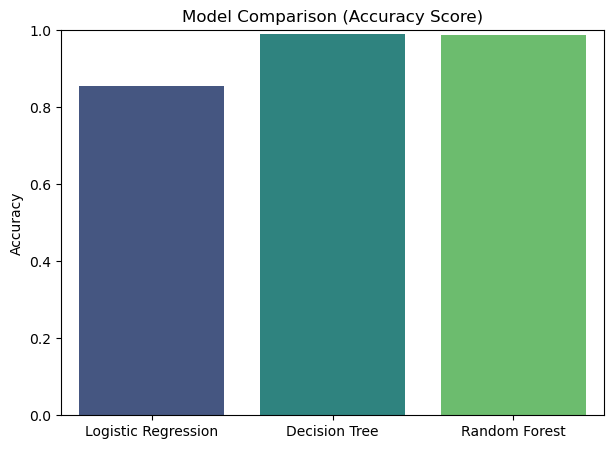

In [20]:
# Visualize Model Comparison
models = list(results.keys())
accuracy_scores = list(results.values())

plt.figure(figsize=(7,5))
sns.barplot(x=models, y=accuracy_scores, palette="viridis")
plt.title("Model Comparison (Accuracy Score)")
plt.ylabel("Accuracy")
plt.ylim(0,1)
plt.show()